# EXPLORATORY DATA ANALYSIS
A notebook to explore the data.

# 1. Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "01_exploratory_data_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 2. Data Cleaning

## 2.1. Data Collection

In [3]:
# Load the dataset
df = pd.read_csv("./dataset/life_expectancy.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Show columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Rename some columns as their names contain trailing spaces
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [6]:
# Lowercase the name of columns
df.columns = [alias.lower() for alias in df.columns]
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_exp', 'hepatitisb', 'measles',
       'bmi', 'under_five_deaths', 'polio', 'tot_exp', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1to19_years',
       'thinness_5to9_years', 'income_comp_of_resources', 'schooling'],
      dtype='object')

In [7]:
# Show the schema and state of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   2938 non-null   object 
 1   year                      2938 non-null   int64  
 2   status                    2938 non-null   object 
 3   life_expectancy           2928 non-null   float64
 4   adult_mortality           2928 non-null   float64
 5   infant_deaths             2938 non-null   int64  
 6   alcohol                   2744 non-null   float64
 7   percentage_exp            2938 non-null   float64
 8   hepatitisb                2385 non-null   float64
 9   measles                   2938 non-null   int64  
 10  bmi                       2904 non-null   float64
 11  under_five_deaths         2938 non-null   int64  
 12  polio                     2919 non-null   float64
 13  tot_exp                   2712 non-null   float64
 14  diphther

**Caution:** Two columns (`country` and `status`) are categorical.

In [8]:
# Convert the categorical columns to type category
df["status"] = df.status.astype("category")
df["country"] = df.country.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country                   2938 non-null   category
 1   year                      2938 non-null   int64   
 2   status                    2938 non-null   category
 3   life_expectancy           2928 non-null   float64 
 4   adult_mortality           2928 non-null   float64 
 5   infant_deaths             2938 non-null   int64   
 6   alcohol                   2744 non-null   float64 
 7   percentage_exp            2938 non-null   float64 
 8   hepatitisb                2385 non-null   float64 
 9   measles                   2938 non-null   int64   
 10  bmi                       2904 non-null   float64 
 11  under_five_deaths         2938 non-null   int64   
 12  polio                     2919 non-null   float64 
 13  tot_exp                   2712 non-null   float6

In [9]:
# Show distinct status
df.status.unique()

['Developing', 'Developed']
Categories (2, object): ['Developed', 'Developing']

In [10]:
# Show distinct countries
df.country.unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Côte d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala'

**Caution:** Some countries have whitespaces in the name.

In [11]:
# Setup to remove whitespaces in the records of a column
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [12]:
# Remove whitespaces in records of country
#df.country = df.country.apply(remove_whitespace)

In [13]:
# Show distinct years in the dataset
df.year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [14]:
# Show the descriptive statistics for numerical features
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,bmi,under_five_deaths,polio,tot_exp,diphtheria,hiv/aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [15]:
# Show the descriptive statistics of categorical features
df[["status", "country"]].describe()

,status,country
count,2938,2938
unique,2,193
top,Developing,Afghanistan
freq,2426,16


## 2.2. Data Missing

Saving figure msno_matrix


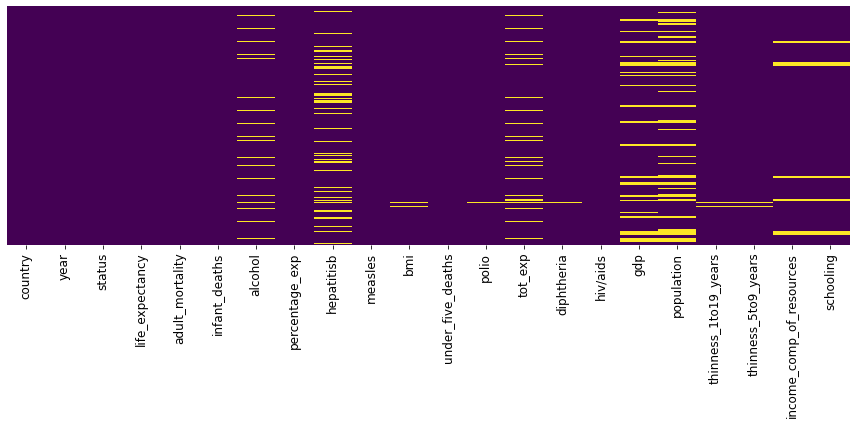

In [16]:
# Show the distribution of missing values
plt.figure(figsize=(12,6))
msno = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
save_fig("msno_matrix")

**Note:** The yellow spaces signify missing entries.

In [17]:
# Identify percentage of null values in each column.
(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

population                  0.221920
hepatitisb                  0.188223
gdp                         0.152485
tot_exp                     0.076923
alcohol                     0.066031
income_comp_of_resources    0.056841
schooling                   0.055480
thinness_5to9_years         0.011572
thinness_1to19_years        0.011572
bmi                         0.011572
polio                       0.006467
diphtheria                  0.006467
life_expectancy             0.003404
adult_mortality             0.003404
hiv/aids                    0.000000
country                     0.000000
year                        0.000000
measles                     0.000000
percentage_exp              0.000000
infant_deaths               0.000000
status                      0.000000
under_five_deaths           0.000000
dtype: float64

**Caution:** The label `life_expectancy` has missing values: Drop the records without label.

In [18]:
# Drop records without label
df.dropna(subset=["life_expectancy"], inplace=True)
df["life_expectancy"].isnull().sum()

0

**Note:** Null values will be removed using `interpolate()` linear method - Filling `NaN` as the mean of the backward and fordward values. This method will be applied on each country.

In [19]:
# Fill NaN using linear interpolation method
num_cols = df.drop(["status", "country"], axis=1).columns.tolist()
for country in df.country.unique().tolist():
    df.loc[df["country"]==country, num_cols] = df.loc[df["country"]==country, num_cols].sort_values(by=["year"]).interpolate(axis=1)
df.isnull().sum()

country                     0
year                        0
status                      0
life_expectancy             0
adult_mortality             0
infant_deaths               0
alcohol                     0
percentage_exp              0
hepatitisb                  0
measles                     0
bmi                         0
under_five_deaths           0
polio                       0
tot_exp                     0
diphtheria                  0
hiv/aids                    0
gdp                         0
population                  0
thinness_1to19_years        0
thinness_5to9_years         0
income_comp_of_resources    0
schooling                   0
dtype: int64

In [20]:
# Cast some columns back to their types
df = df.astype({"year": "int64", "measles": "int64", "under_five_deaths": "int64"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country                   2928 non-null   category
 1   year                      2928 non-null   int64   
 2   status                    2928 non-null   category
 3   life_expectancy           2928 non-null   float64 
 4   adult_mortality           2928 non-null   float64 
 5   infant_deaths             2928 non-null   int64   
 6   alcohol                   2928 non-null   float64 
 7   percentage_exp            2928 non-null   float64 
 8   hepatitisb                2928 non-null   float64 
 9   measles                   2928 non-null   int64   
 10  bmi                       2928 non-null   float64 
 11  under_five_deaths         2928 non-null   int64   
 12  polio                     2928 non-null   float64 
 13  tot_exp                   2928 non-null   float6

## 2.3. Outlier Detection

**Note:** Some techniques used to tackle univariate outliers in this section wil be described in https://academic.uprm.edu/eacuna/vene31.pdf.

In [21]:
# Create the dataset including only numeric variables
num_df = df.drop(["country", "status", "year"], axis=1)
num_df.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,bmi,under_five_deaths,polio,tot_exp,diphtheria,hiv/aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Saving figure box_plot_features


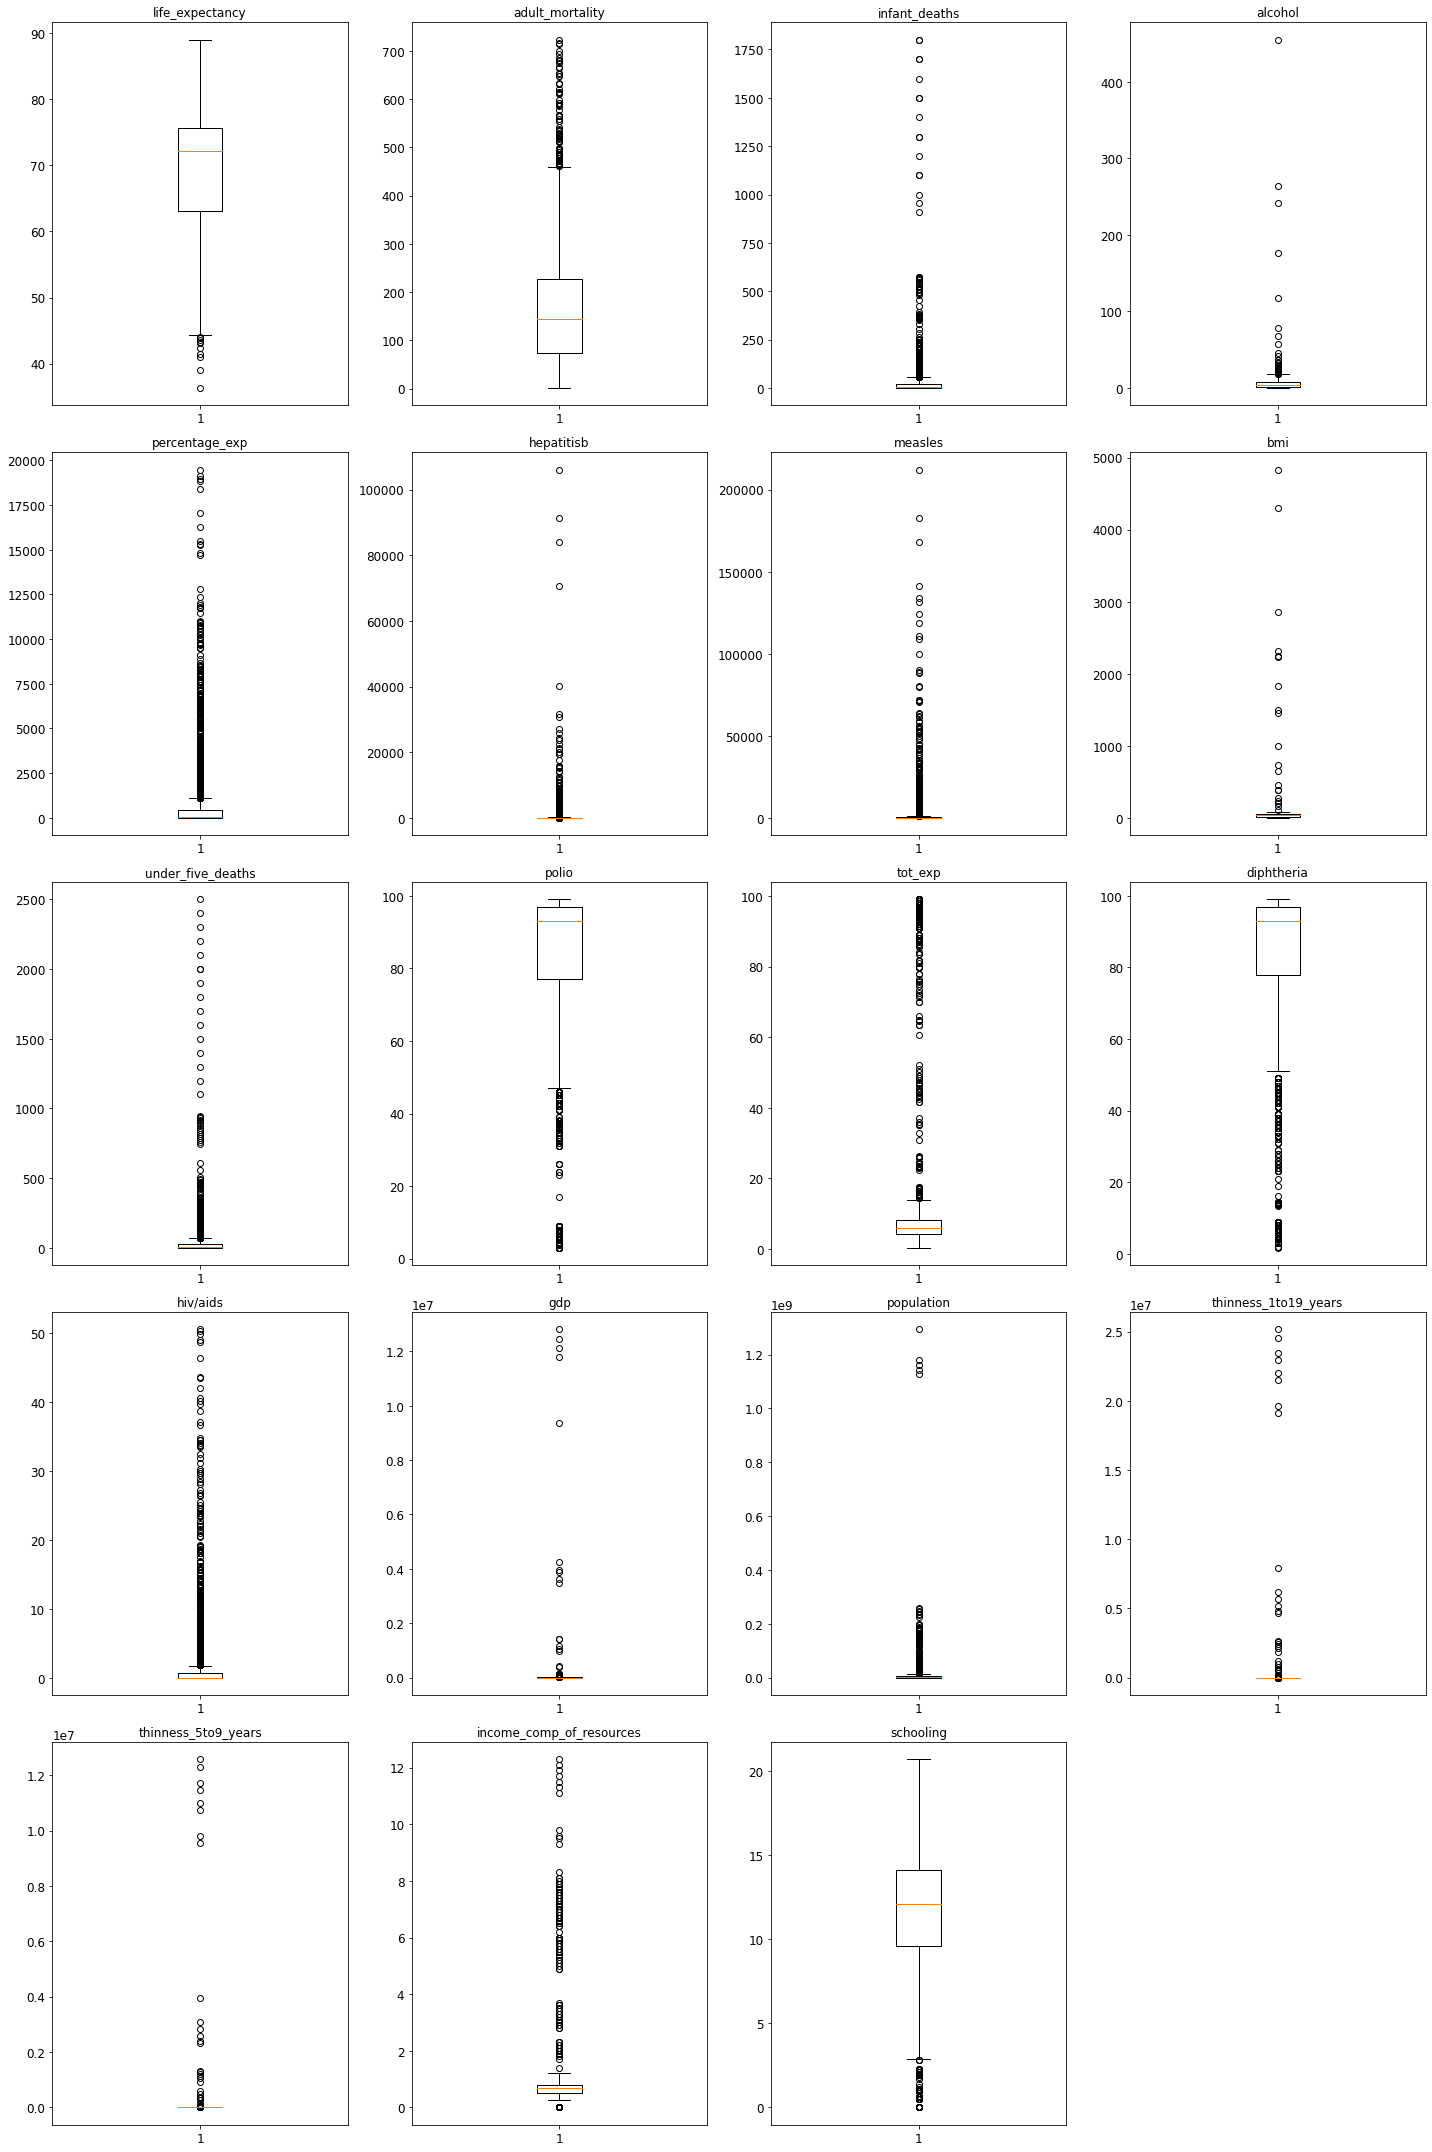

In [22]:
# Visualize the outliers using box plot
plt.figure(figsize=(20,30))
i = 1
for column in num_df.columns:
    plt.subplot(5, 4, i)
    plt.boxplot(df[column], whis=1.5)
    plt.title(column)
    i += 1
save_fig("box_plot_features")

**Note:** The boxplot parts.

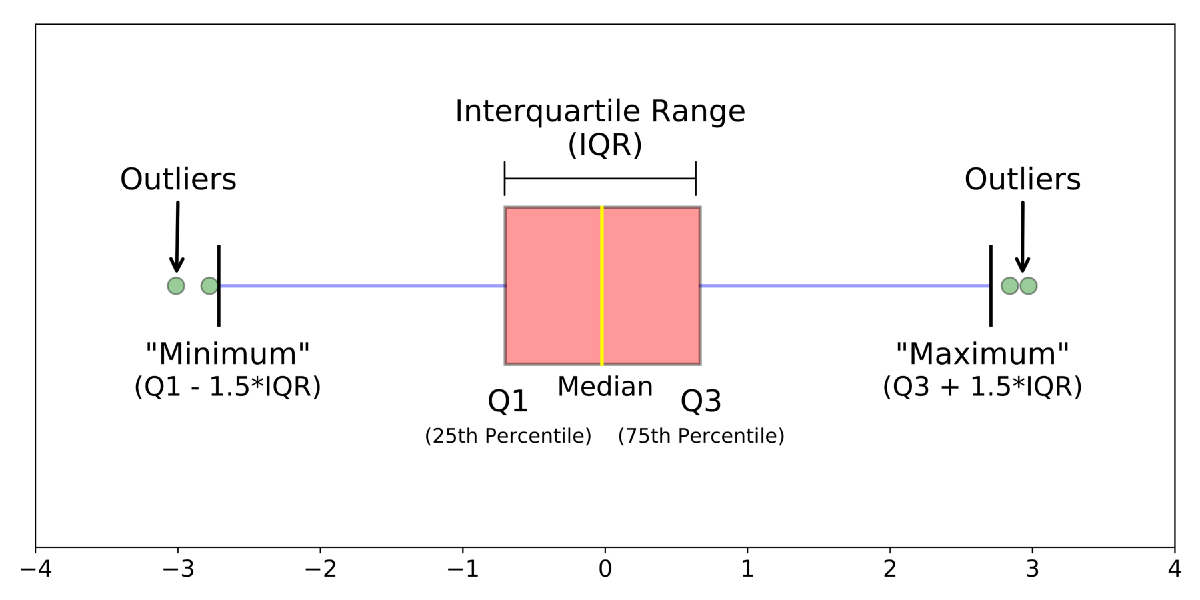

In [23]:
# Calculate number of univariate outliners and its percentage based on IQR mathematical formula
outlier_df = pd.DataFrame(columns=["number", "percentage", "upper_quantile", "lower_quantile"], 
                          index=num_df.columns)

for column in num_df.columns:
    q75, q25 = np.percentile(df[column], [75, 25])
    IQR = q75 - q25
    upper = q75 + (IQR * 1.5)
    lower = q25 - (IQR * 1.5)
    outlier_df.loc[column, "upper_quantile"] = upper
    outlier_df.loc[column, "lower_quantile"] = lower
    outlier_df.loc[column, "number"] = len(np.where((df[column] > upper) | (df[column] < lower))[0])
    outlier_df.loc[column, "percentage"] = len(np.where((df[column] > upper) | (df[column] < lower))[0]) * 100 / len(df)
    
outlier_df.sort_values(by=["number", "percentage"], ascending=False)

,number,percentage,upper_quantile,lower_quantile
hepatitisb,706,24.112022,131.0,43.0
measles,542,18.510929,905.625,-543.375
hiv/aids,542,18.510929,1.85,-0.95
population,438,14.959016,11461365.625,-6854871.375
gdp,424,14.480874,12480.144348,-7141.756107
under_five_deaths,394,13.456284,70.0,-42.0
percentage_exp,388,13.251366,1099.254858,-651.786572
diphtheria,316,10.79235,125.5,49.5
infant_deaths,315,10.758197,55.0,-33.0
polio,270,9.221311,127.0,47.0


**Suggestion:** This section is just to gain an insight of how irregular the statistics of the data is, which helps to select suitable strategies for ML pipeline later.

**Caution:** I assume that the data is consistent (or nearly). For the redundant data, the further exploration into the dataset may capture it and then I will try to tackle such cases.

# 3. Exploratory Data Analysis

In [24]:
# Show the descriptive statistics for numerical columns
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,bmi,under_five_deaths,polio,tot_exp,diphtheria,hiv/aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,5.227361,740.321185,609.620347,2427.855874,47.554201,42.179303,82.153460,11.449710,81.849617,1.747712,3.529045e+04,9.957659e+06,7.941224e+04,3.970855e+04,0.822266,11.573053
std,4.61056,9.523867,124.292079,118.114450,12.292733,1990.930605,3930.909022,11485.970937,159.629655,160.700547,23.877735,20.639728,24.343860,5.085542,5.136172e+05,5.416492e+07,1.202291e+06,6.011452e+05,1.125777,3.782065
min,2000.00000,36.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,1.680000,0.100000,1.333333e-01,1.666667e-01,1.000000e-01,1.000000e-01,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.800000,4.853964,76.000000,0.000000,19.400000,0.000000,77.000000,4.360000,78.000000,0.100000,2.164566e+02,1.371750e+04,1.600000e+00,1.600000e+00,0.500000,9.600000
50%,2007.50000,72.100000,144.000000,3.000000,3.675000,65.611455,93.000000,17.000000,43.500000,4.000000,93.000000,5.940000,93.000000,0.100000,1.220952e+03,5.459175e+05,3.400000e+00,3.400000e+00,0.684500,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.840000,442.614322,98.000000,362.250000,56.300000,28.000000,97.000000,8.180000,97.000000,0.800000,5.121932e+03,4.592777e+06,7.300000e+00,7.300000e+00,0.792000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,455.000000,19479.911610,106102.740888,212183.000000,4832.000000,2500.000000,99.000000,99.000000,99.000000,50.600000,1.281381e+07,1.293859e+09,2.515861e+07,1.257930e+07,12.300000,20.700000


## 3.1. Univariate Analysis

Saving figure attributes_histogram_plots


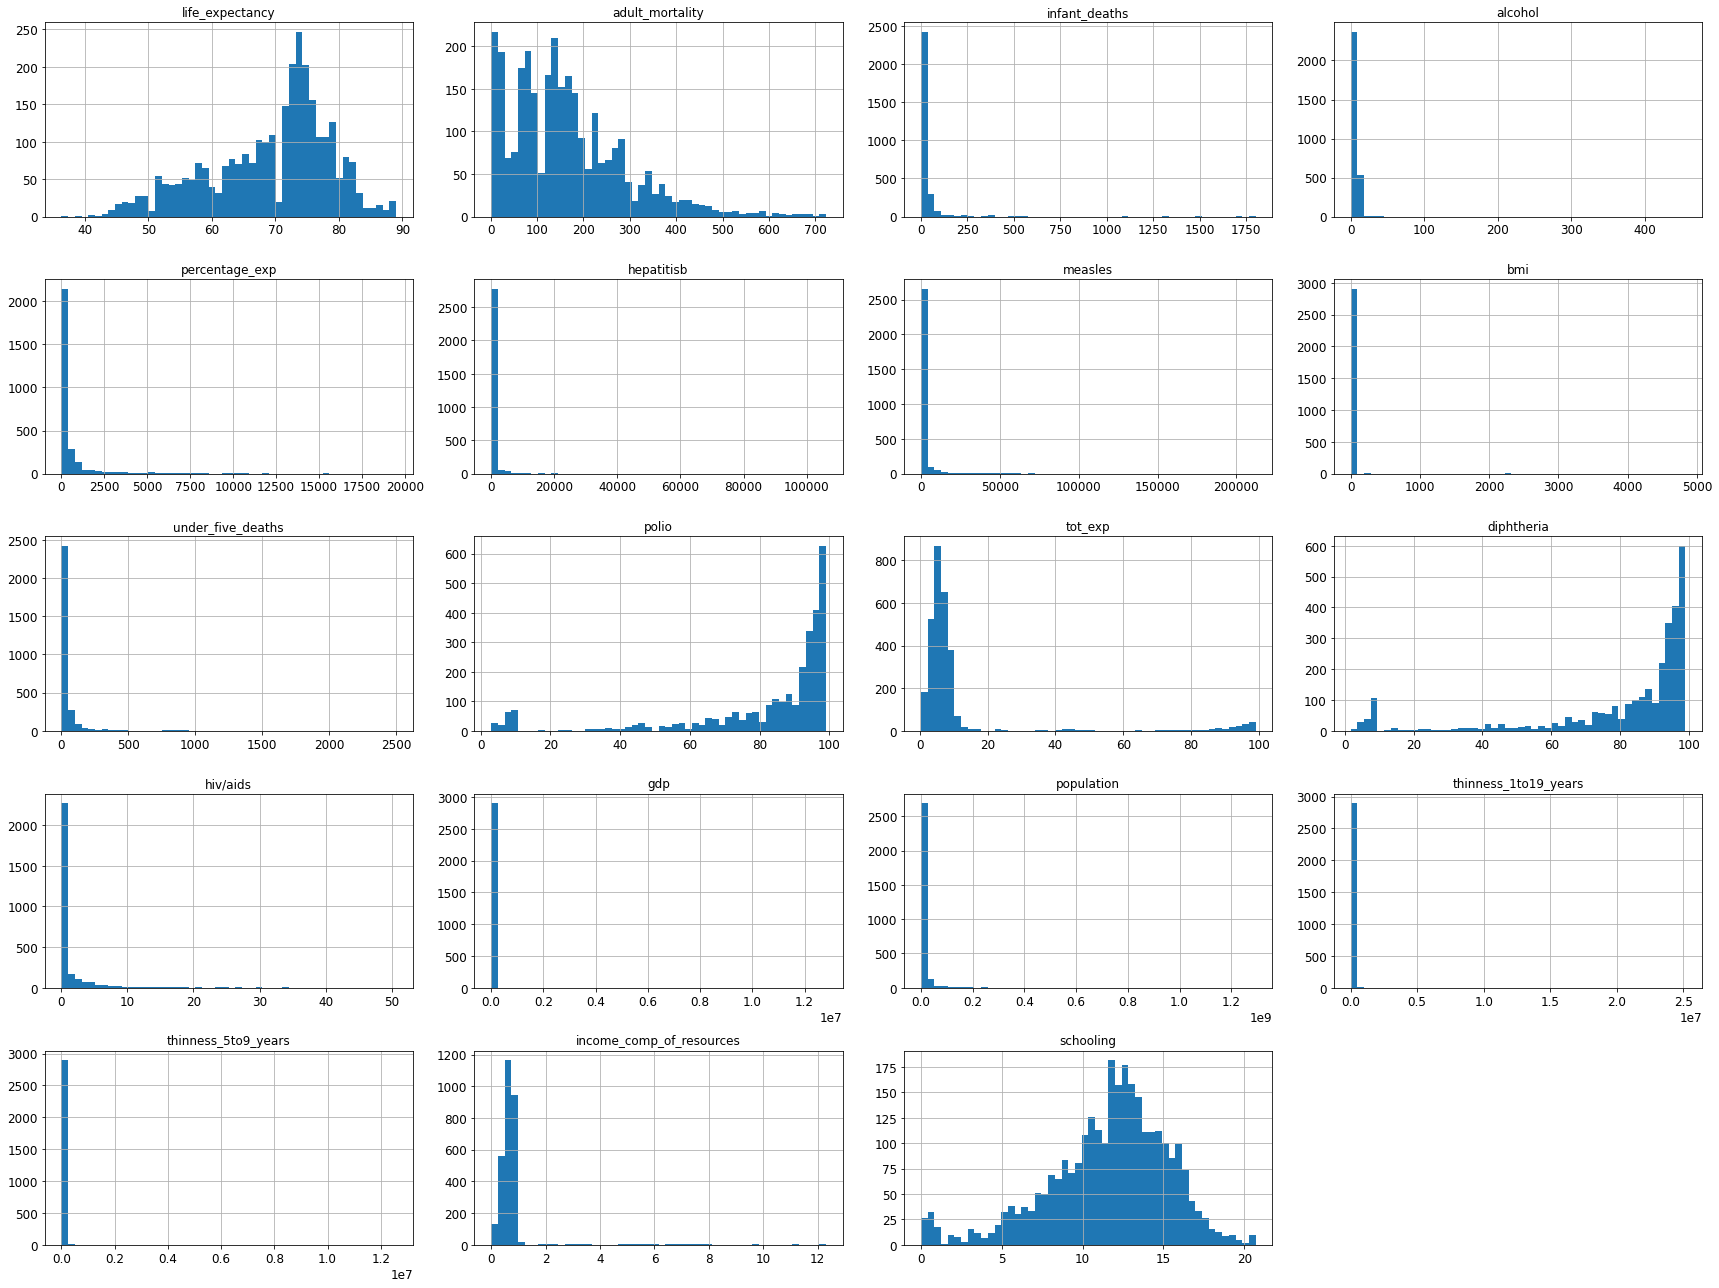

In [25]:
# Show the histogram of numerical variables
df.drop(columns=["year"]).hist(bins=50, figsize=(24, 18))
save_fig("attributes_histogram_plots")

**Note:** Most of distributions of features are skew. Since the data is statistically irregular (a lot of univariate outliers), `StandardScaler` is a good choice for ML pipeline.

In [26]:
# Show the descriptive statistics of categorical variables
df[["status", "country"]].describe()

,status,country
count,2928,2928
unique,2,183
top,Developing,Afghanistan
freq,2416,16


**Note:** Status seems imbalanced (82.5% are developing). However, following worddata.info, 85.22% of countries are developing over the world today, which means status is not biased. <br />
Source: https://www.worlddata.info/developing-countries.php

Saving figure avg_life_expectancy_by_status


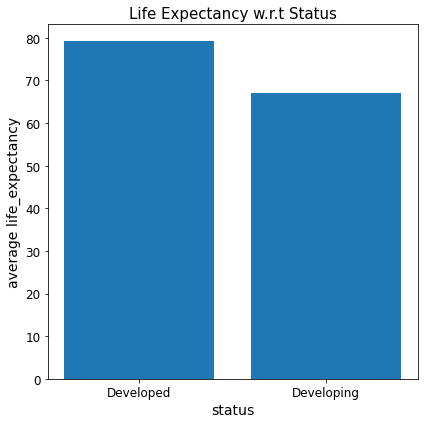

In [27]:
# Show life expectancy w.r.t status using bar plot
plt.figure(figsize=(6,6))
plt.bar(df.groupby('status')['status'].count().index, 
        df.groupby('status')['life_expectancy'].mean())
plt.xlabel("status")
plt.ylabel("average life_expectancy")
plt.title("Life Expectancy w.r.t Status", fontsize=15)
save_fig("avg_life_expectancy_by_status")

**Note:** The hypothesis testing, with null hypothesis being that there is no significant difference between the average lifespan of developed and developing country, rejects the null one, which means the difference is significant.

Saving figure avg_life_expectancy_by_country


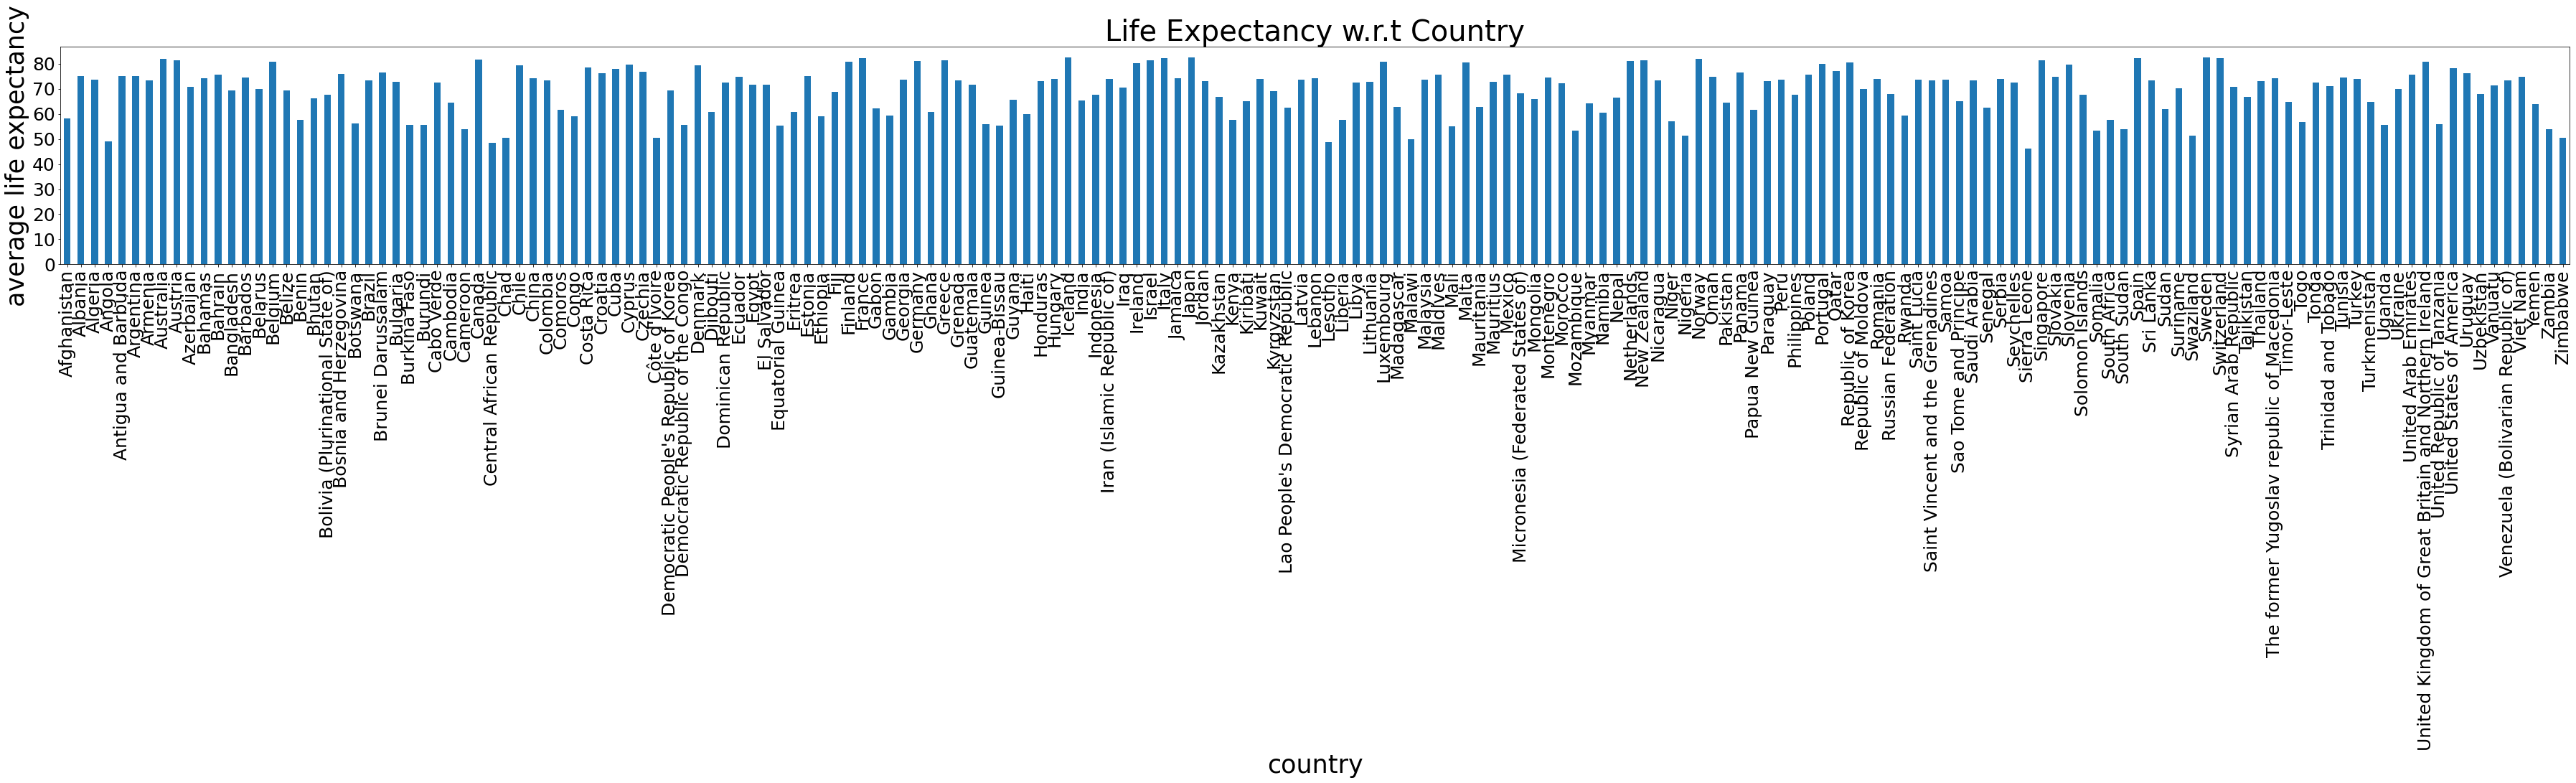

In [28]:
# Show life expectancy w.r.t country using bar plot
df_country = df.groupby('country')['life_expectancy'].mean().dropna()
df_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life Expectancy w.r.t Country",fontsize=40)
plt.xlabel("country",fontsize=35)
plt.ylabel("average life expectancy",fontsize=35)
save_fig("avg_life_expectancy_by_country")

Saving figure avg_life_expectancy_by_year


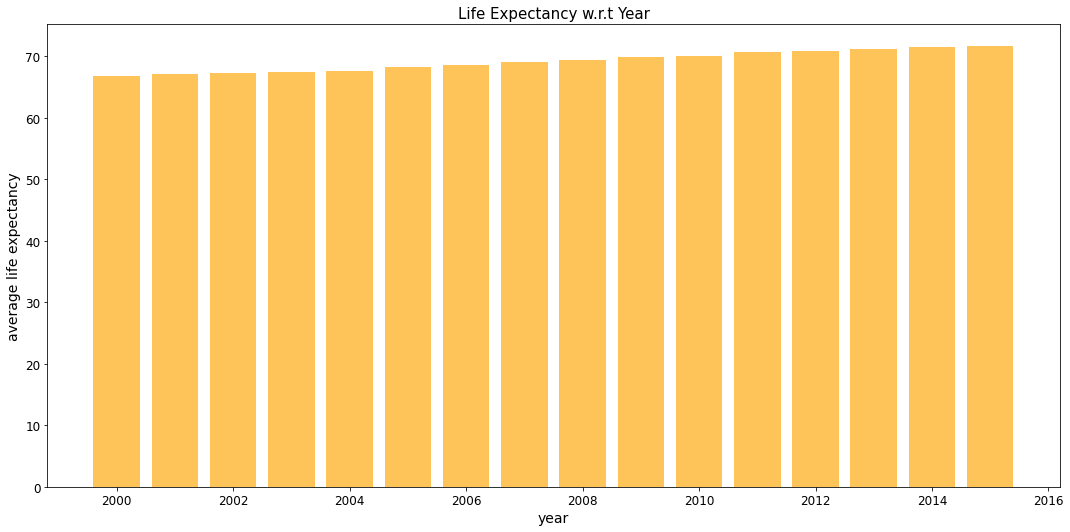

In [29]:
# Show life expectancy w.r.t year using bar plot.
plt.figure(figsize=(15,7.5))
plt.bar(df.groupby('year')['year'].count().index, df.groupby('year')['life_expectancy'].mean(),color='orange',alpha=0.65)
plt.xlabel("year")
plt.ylabel("average life expectancy")
plt.title("Life Expectancy w.r.t Year", fontsize=15)
save_fig("avg_life_expectancy_by_year")

## 3.2. Multivariate Analysis

Saving figure scatter_matrix_plot_vs_life_expectancy


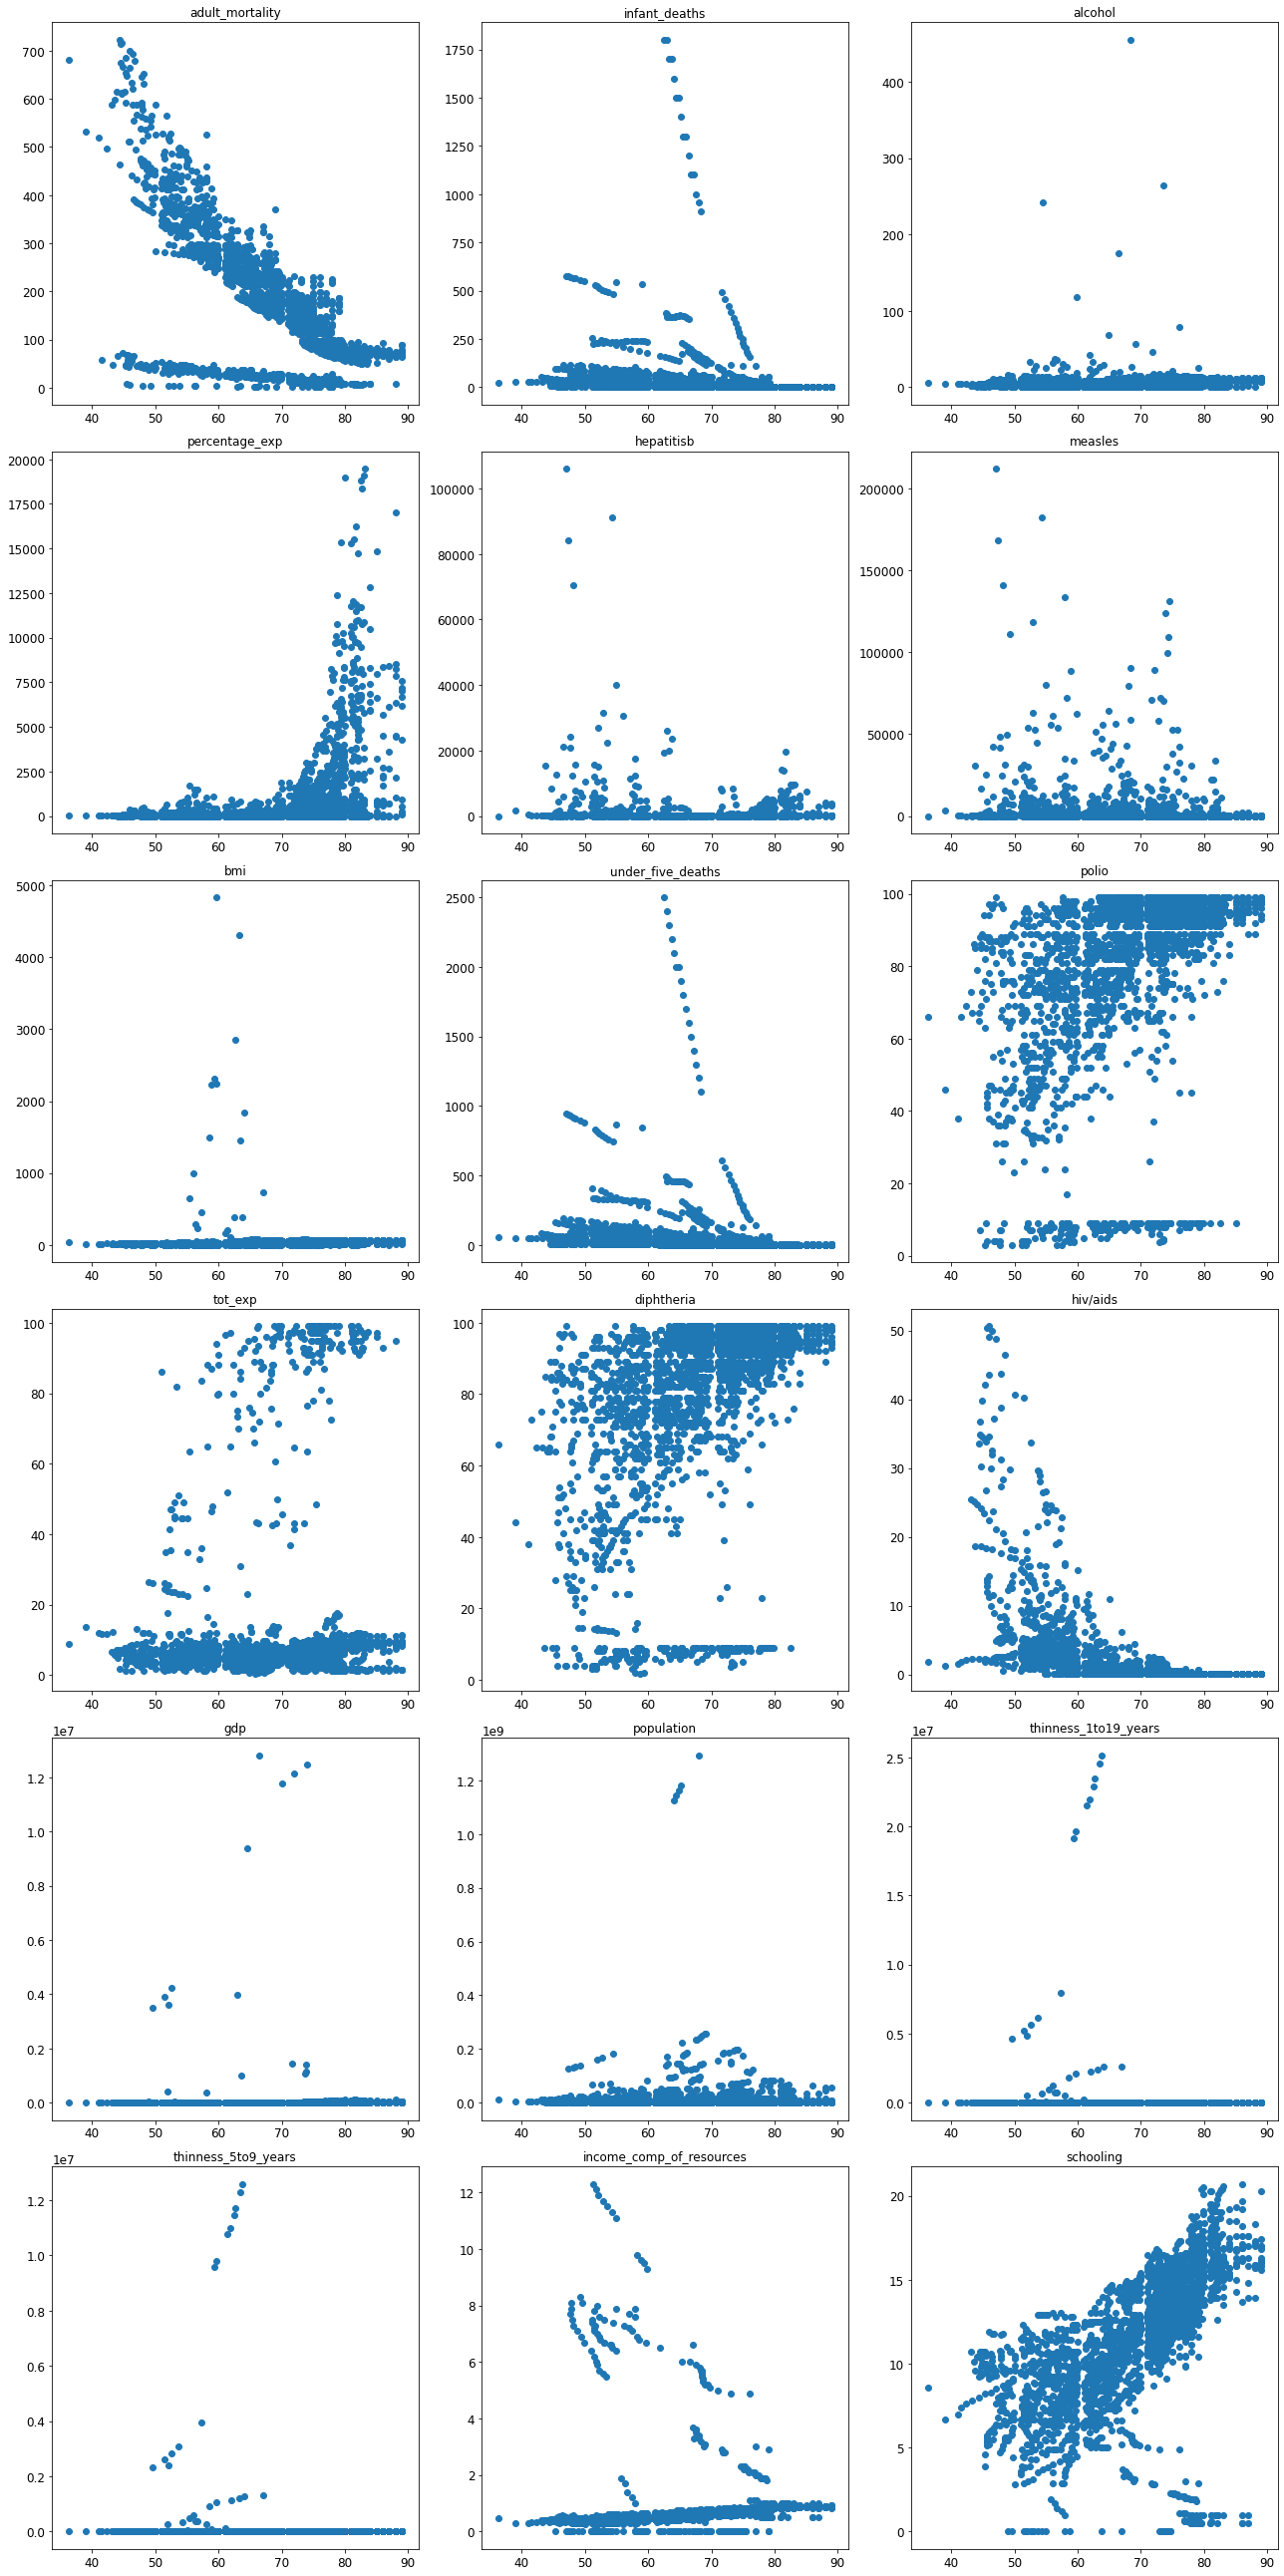

In [30]:
# Scatter plot between life_expectancy and all numeric variables
plt.figure(figsize=(18,36))
i = 1
for column in num_df.drop(columns=["life_expectancy"]).columns:
    plt.subplot(6, 3, i)
    plt.scatter(df["life_expectancy"], df[column])
    plt.title(column)
    i += 1
save_fig("scatter_matrix_plot_vs_life_expectancy")

**Note:** Since there are many bivariate outliers, it is difficult to clearly see the relationship between the target and some attributes (e.g. population, income_comp_of_resources,...). Fortunately, it still easy to catch some linear relationship such as adult mortality and schooling.

**Suggestion:** Spearman’s correlation is preferrable to Pearson’s correlation in this case since:
- Numerical variables are visibly non-Gaussian.
- The link between two numerical variables is visibly non-linear.
- Many outliers in distribution.

In [35]:
# Get diagonal and lower triangular pairs of correlation matrix
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

Saving figure heat_map_of_spear_corrmat


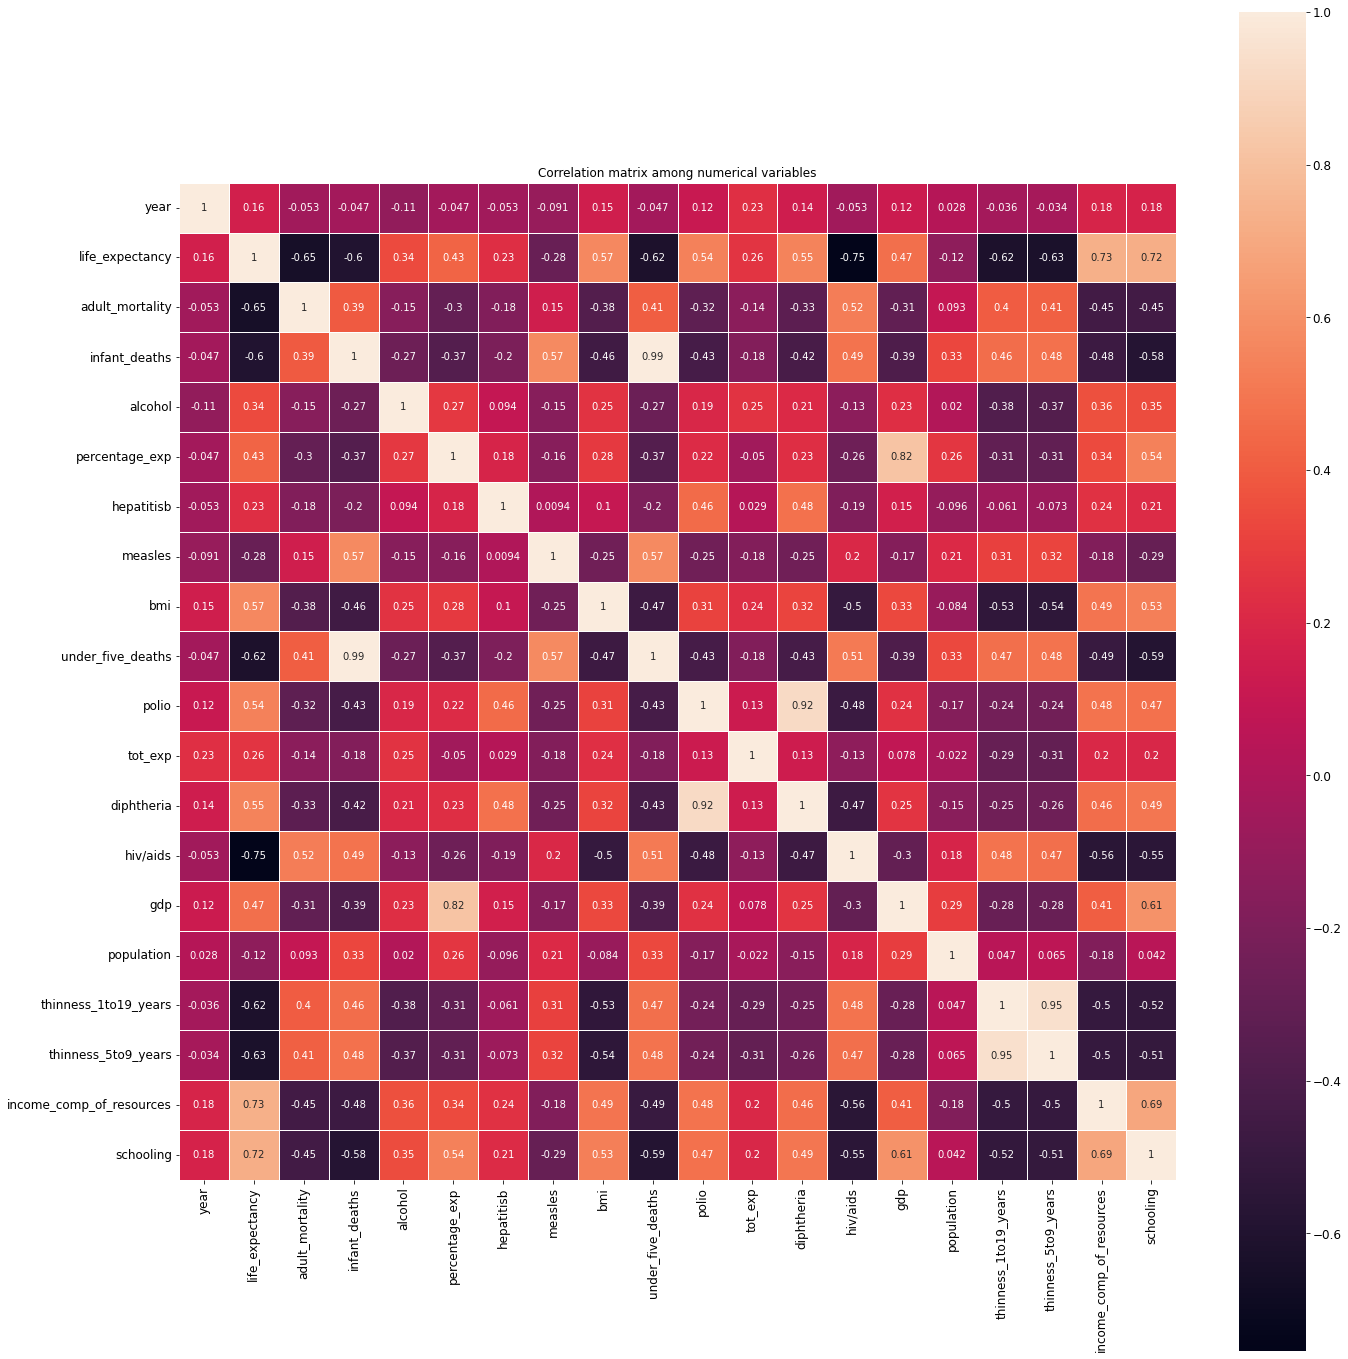

In [36]:
# Check for the monotonic relationships between variables using Spearman's corr
corr_mat = df.drop(columns=["country", "status"]).corr(method="spearman")

plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among numerical variables")
save_fig("heat_map_of_spear_corrmat")

In [37]:
# Get the most correlated pairs of variables
tri_corr_mat = corr_mat.unstack()
cells_to_drop = get_redundant_pairs(df.drop(columns=["country", "status"]))
tri_corr_mat = tri_corr_mat.drop(labels=cells_to_drop).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_mat[-10:]))
print("\n----------------------------------------------------------------")
print("\nTop 10 feature pairs:\n" + str(tri_corr_mat.abs().sort_values(ascending=False)[:10]))

Top 10 positive correlated feature pairs:
infant_deaths             under_five_deaths           0.993221
thinness_1to19_years      thinness_5to9_years         0.948435
polio                     diphtheria                  0.921455
percentage_exp            gdp                         0.821022
life_expectancy           income_comp_of_resources    0.729473
                          schooling                   0.722382
income_comp_of_resources  schooling                   0.691046
gdp                       schooling                   0.606093
measles                   under_five_deaths           0.572276
infant_deaths             measles                     0.571157
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature pairs:
hiv/aids           schooling                  -0.554349
                   income_comp_of_resources   -0.559156
infant_deaths      schooling                  -0.578362
under_five_deaths  schooling        

**Note:** Strength of Spearman's correlation - Reference: J. Fowler, L. Cohen and P. Jarvis, 2009, Practical Statistics for Field Biology, p. 132. <br />
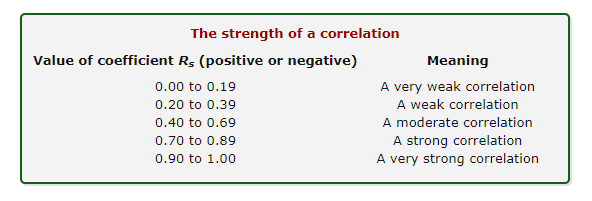 <br />
Then features `hiv/aids`, `income_comp_of_resources` and `schooling` could be a good choices for stratified sampling (avoid sampling bias) later.

**Suggestion:** Some sections in other notebook also reveal the colinearity problem of the dataset through Pearson's correlation. Found from a post in Stack Exchange, the need to reduce multicollinearity depends on its **severity** and the **primary goal for regression models**.
- The severity of the problems increases with the degree of the multicollinearity. Having only moderate multicollinearity, you may not need to resolve it
- Multicollinearity affects only the specific independent variables that are correlated. If multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it.
- If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity since it affects the coefficients and p-values only.

**This might mean that the highly correlated variables do not have to be dropped**. But the statement of Occam's razor is that "*with competing theories or explanations, the simpler one, for example a model with fewer parameters, is to be preferred*".

Stack Exchange: https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features. <br />
Reference: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis. <br />
Occam's razor: https://en.wikipedia.org/wiki/Occam%27s_razor. <br />
Reference for 3rd point: Applied Linear Statistical Models, p289, 4th Edition.

### Life Expectancy w.r.t Other Fetures by Status

Saving figure scatter_matrix_plot_vs_life_expectancy_by_status


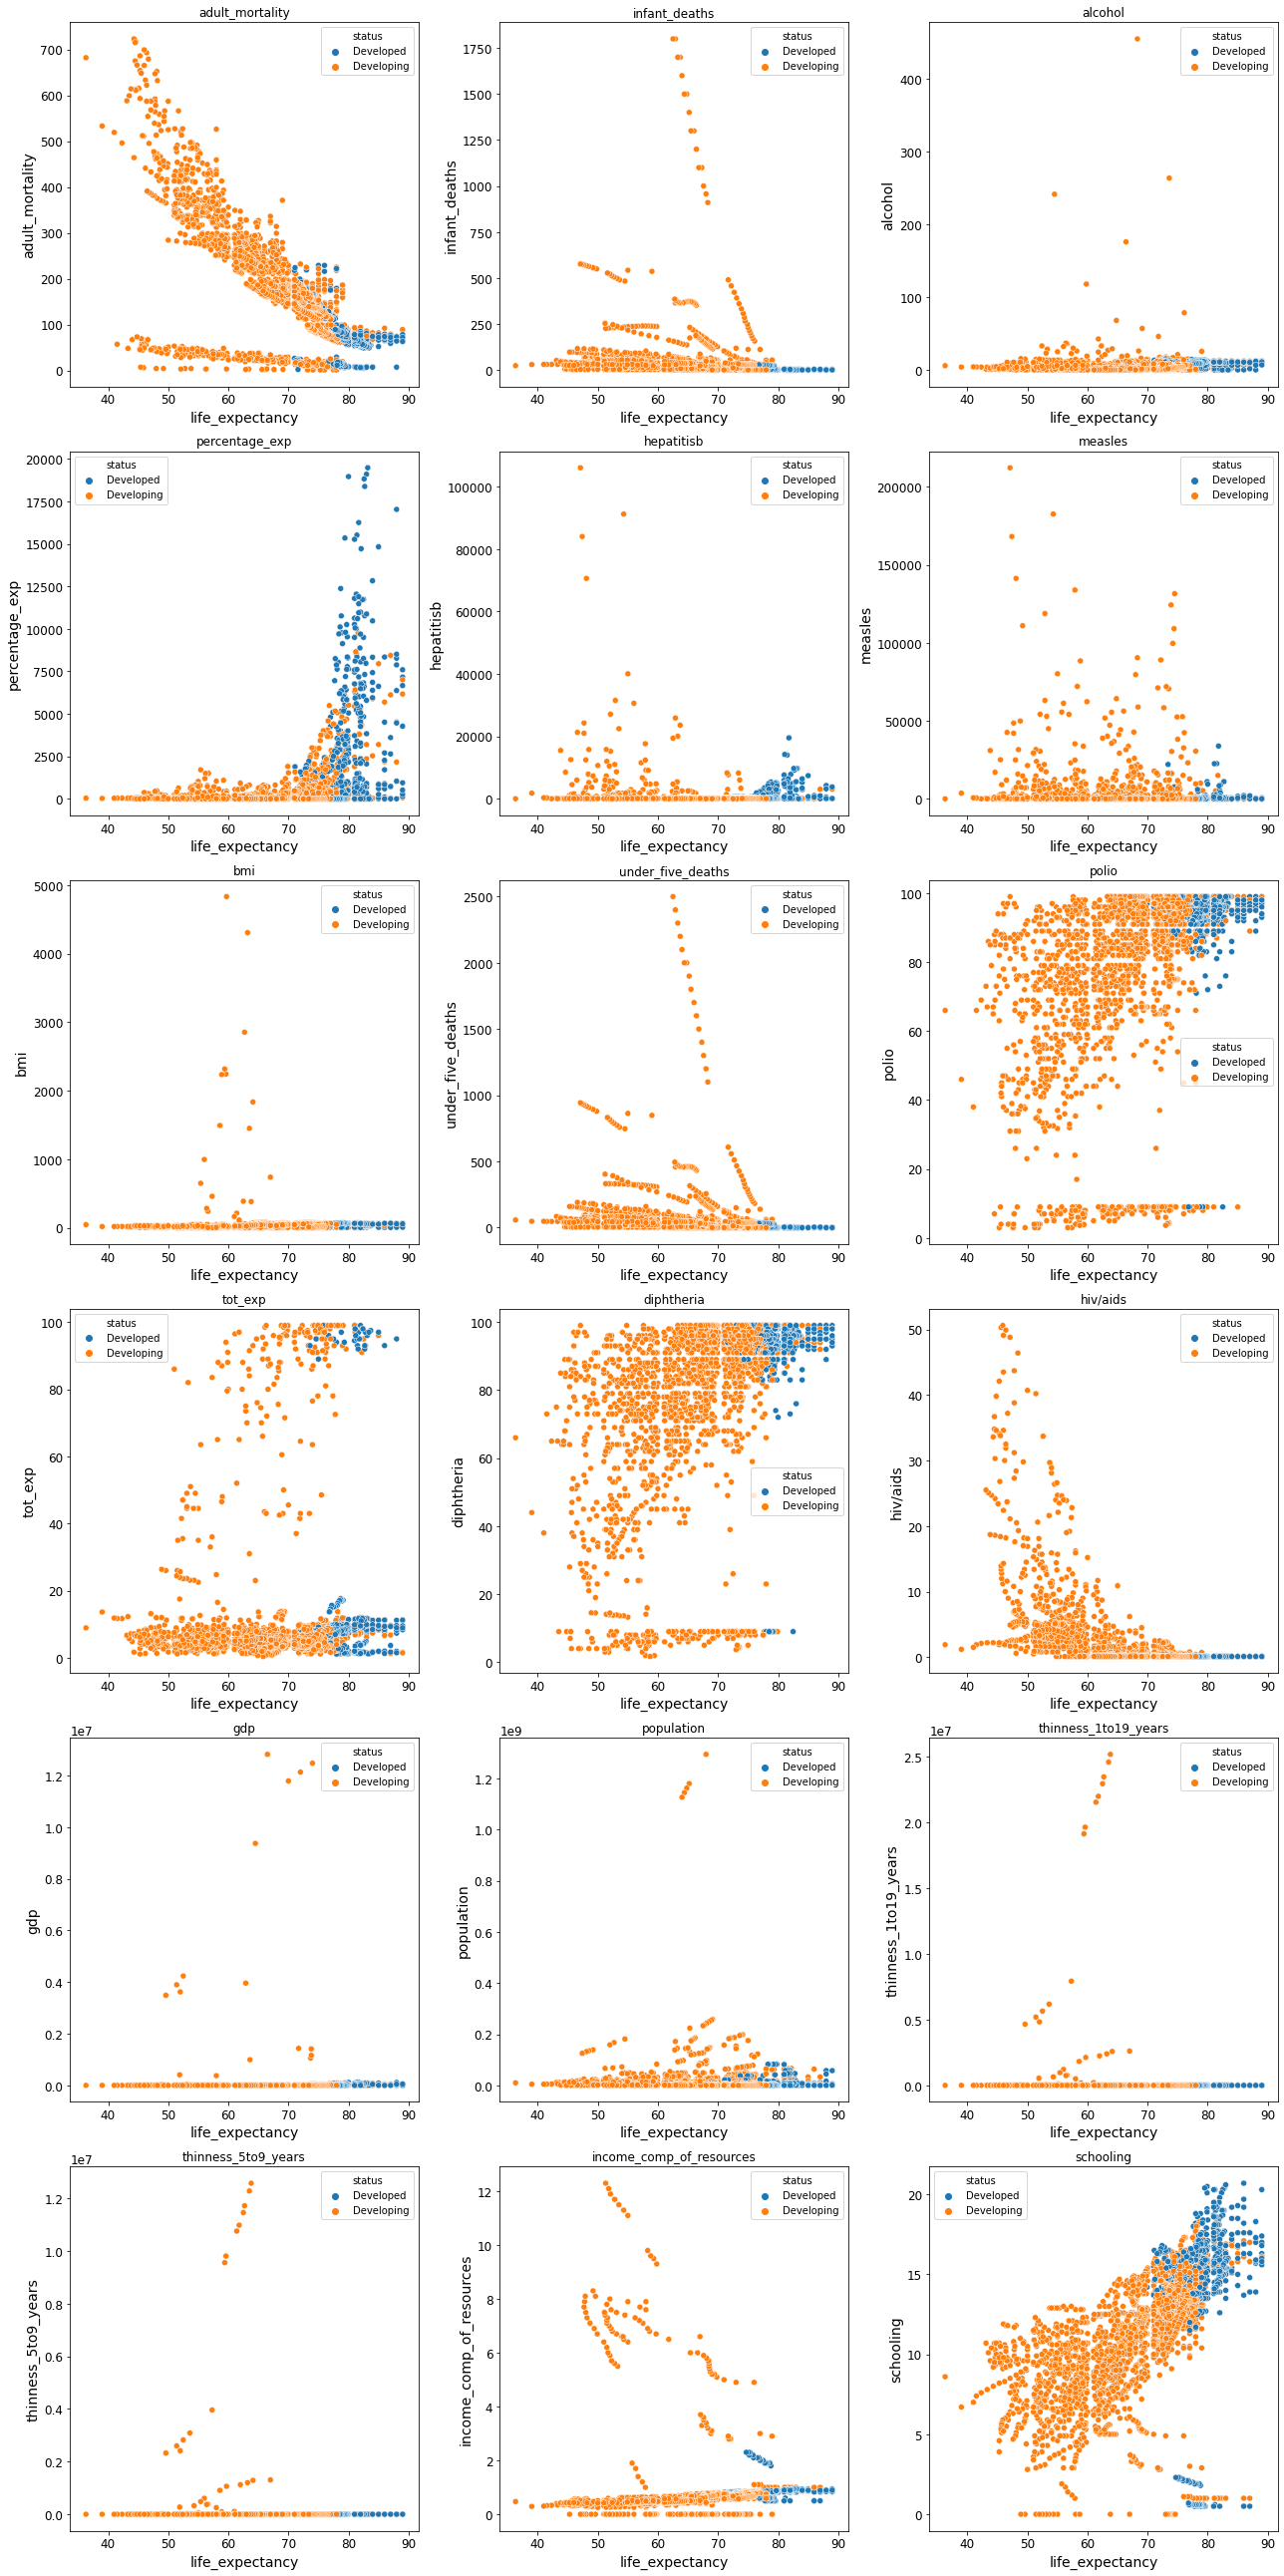

In [34]:
plt.figure(figsize=(18,36))
i = 1
for column in num_df.drop(columns=["life_expectancy"]).columns:
    plt.subplot(6, 3, i)
    sns.scatterplot('life_expectancy', column, data=df, hue='status')
    plt.title(column)
    i += 1
save_fig("scatter_matrix_plot_vs_life_expectancy_by_status")

**Note:** Developed countries stays on the right of most of figures. One can see that they really have higher life expectancy compared to the developing. Also, due to hypothesis testing carried before, status can be of importance to determine life expectancy.

**Suggestion:** Status can be a candidate for stratified sampling.

### Life Expectancy by Continent

**Caution:** Country seems not to be a good feature since in such cases like one-hot vector, new instances from countries that do not appear in the dataset will be encoded by the same zero vector. This means it may need to transform to either locations (longitude and latitude), regions, continents or something else.

In [35]:
# Load the dataset
country_mapping = pd.read_csv("./dataset/continents/country_mapping.csv")
country_mapping.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [36]:
# Inspect the dataset
country_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [37]:
# Show the regions included
country_mapping.region.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', nan],
      dtype=object)

In [38]:
# Check the null in region
country_mapping[~country_mapping["region"].isin(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas'])]

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Fill the region Antarctica
country_mapping.loc[~country_mapping["region"].isin(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']), "region"] = "Antarctica"

In [40]:
# Show the regions included
country_mapping.region.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', 'Antarctica'],
      dtype=object)

**Note:** We will transform the `country` into `continent`, which reduces the number of features of one-hot vector and also avoid the cases mentioned in EDA notebook.

In [41]:
# Change name of the column name
country_mapping.rename(columns={"name": "country"}, inplace=True)
country_mapping.head()

,country,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [42]:
country_mapping["country"].unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Sint Eustatius and Saba',
       'Bosnia And Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Cook Islands', 'Costa Rica',
       "Côte D'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', '

In [43]:
# Transform country to continent
country2continent = dict()
for country in country_mapping['country']:
    country2continent[country] = country_mapping[country_mapping['country']==country]['region'].values[0]

update = {'Republic of Korea' : 'Asia', 
          'Republic of Moldova' : 'Europe' ,
          'Democratic Republic of the Congo' : 'Africa', 
          'Czechia' : 'Europe', 
          'United Republic of Tanzania' : 'Africa', 
          'The former Yugoslav republic of Macedonia' : 'Europe', 
          "Democratic People's Republic of Korea" : 'Asia',
          'Bolivia (Plurinational State of)': 'Americas',
          'Viet Nam': 'Asia',
          'United States of America': 'Americas',
          'Venezuela (Bolivarian Republic of)': 'Americas',
          'United Kingdom of Great Britain and Northern Ireland': 'Europe',
          'Swaziland': 'Africa',
          'Syrian Arab Republic': 'Asia',
          "Lao People's Democratic Republic": 'Asia',
          'Iran (Islamic Republic of)': 'Asia',
          "Côte d'Ivoire": 'Africa',
          "Bosnia and Herzegovina": 'Europe',
          "Guinea-Bissau": 'Africa',
          "Russian Federation": 'Europe'
         }

country2continent.update(update)

df_continent = df.copy()
df_continent['continent'] = df_continent['country'].copy().replace(country2continent)
df_continent.continent.isna().sum()

0

In [44]:
df_continent["continent"].unique()

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']

In [45]:
# Trasform country-continent to dictionary
country_continents = dict()
for country in list(df["country"].unique()):
    continent = df_continent.loc[df["country"]==country, "continent"].iloc[-1]
    country_continents[country] = country_continents.get(country, continent)
country_continents

{'Afghanistan': 'Asia',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'Angola': 'Africa',
 'Antigua and Barbuda': 'Americas',
 'Argentina': 'Americas',
 'Armenia': 'Asia',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'Americas',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'Americas',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'Americas',
 'Benin': 'Africa',
 'Bhutan': 'Asia',
 'Bolivia (Plurinational State of)': 'Americas',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'Americas',
 'Brunei Darussalam': 'Asia',
 'Bulgaria': 'Europe',
 'Burkina Faso': 'Africa',
 'Burundi': 'Africa',
 "Côte d'Ivoire": 'Africa',
 'Cabo Verde': 'Africa',
 'Cambodia': 'Asia',
 'Cameroon': 'Africa',
 'Canada': 'Americas',
 'Central African Republic': 'Africa',
 'Chad': 'Africa',
 'Chile': 'Americas',
 'China': 'Asia',
 'Colombia': 'Americas',
 'Comoros': 'Africa',
 'Congo': 'Africa',
 'Costa Rica': 'Americas',
 'Croatia': 'Eu

In [46]:
# Dump into JSON file for later usage
import json
    
with open("./dataset/continents/continent.json", "w") as f:
    json.dump(country_continents, f)